# Financial Portfolio Optimization

This project explores the construction and optimization of a financial portfolio using historical stock data from Yahoo Finance. By analyzing a diverse selection of companies across the technology, automotive, and entertainment sectors, we aim to understand how asset returns, volatility, and correlation influence overall portfolio performance.

Using daily stock data spanning from **April 1st, 2019 to April 1st, 2024**, this analysis applies core principles of time series modeling and modern portfolio theory to visualize trends, measure risk, and identify optimal investment strategies.

### Stocks Included:
- Apple (AAPL)
- Microsoft (MSFT)
- Tesla (TSLA)
- Amazon (AMZN)
- NVIDIA (NVDA)
- AMD (AMD)
- META (META)
- Netflix (NFLX)
- Disney (DIS)

<hr style="border: 1px solid #fdb515;" />

## Project Objectives
- **Import & Clean Data**: Retrieve historical stock prices from Yahoo Finance and prepare for analysis.
- **Visualize & Analyze**: Plot trends, compute log returns, volatility, and inter-asset relationships.
- **Simulate Portfolios**: Generate random portfolios to explore diversification and risk-return tradeoffs.
- **Optimize Performance**: Identify portfolios with minimum volatility and maximum Sharpe ratio using real risk-free rates.
- **Evaluate Contributors**: Analyze which assets drive portfolio return and risk.
- **Compare Strategies**: Contrast optimized portfolios and summarize investment insights.



# Section 1: Data Processing & Visualization
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

In this section, we begin by importing and loading historical stock price data for our selected companies. We then visualize overall price trends and generate individual subplots to compare how each stock has moved over time.

We focus on the `'Close'` prices from April 1st, 2019 to April 1st, 2024, using the `yfinance` package to retrieve the data.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

stocks = ["NVDA", "AMZN", "META", "NFLX", "DIS", "TSLA", "MSFT", "AMD", "AAPL"]
stocks_data = yf.download(stocks, start="2019-04-01", end="2024-04-01")

print(stocks_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  9 of 9 completed

Price           Close                                                \
Ticker           AAPL        AMD       AMZN         DIS        META   
Date                                                                  
2019-04-01  45.810326  26.360001  90.709503  109.795227  167.908646   
2019-04-02  46.476265  26.750000  90.698997  109.258492  173.382843   
2019-04-03  46.794846  29.020000  91.035004  109.804985  172.725937   
2019-04-04  46.876286  29.090000  90.943001  111.981178  175.194321   
2019-04-05  47.190105  28.980000  91.863998  112.225136  174.895706   

Price                                                         High  ...  \
Ticker            MSFT        NFLX      NVDA       TSLA       AAPL  ...   
Date                                                                ...   
2019-04-01  112.435806  366.959991  4.524565  19.278667  45.915722  ...   
2019-04-02  112.596413  367.720001  4.542436  19.058666  46.581665  ...   
2019-04-03  113.333282  369.750000  4.681936  19.454000 

<hr style="border: 1px solid #fdb515;" />

### Graphs of Adjusted Daily Closing Prices

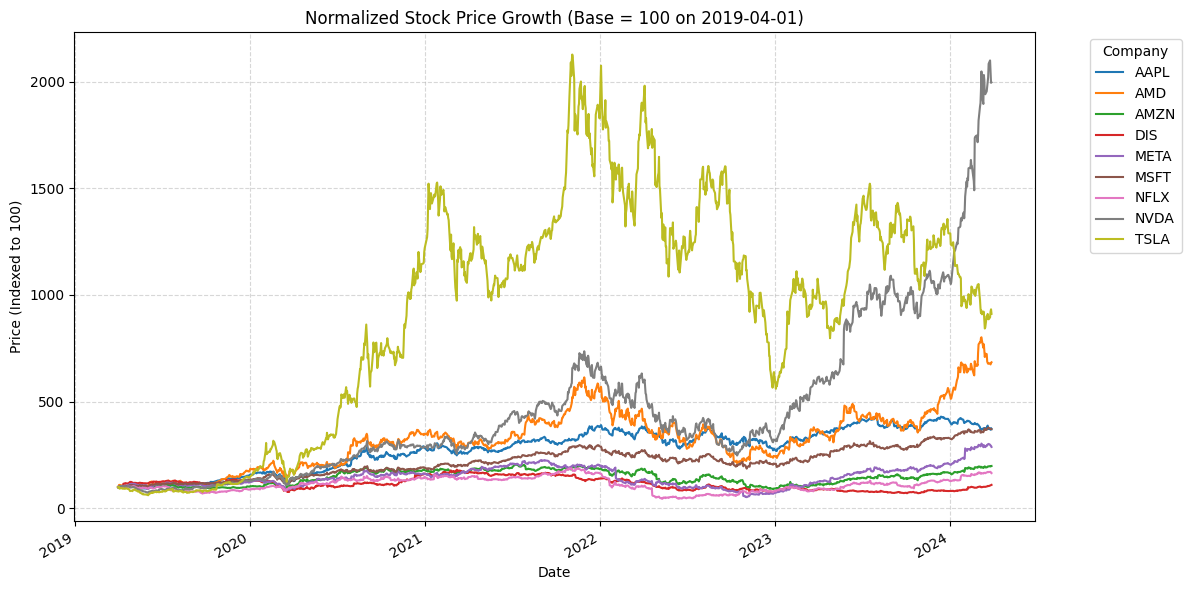

In [ ]:
normalized = stocks_data['Close'] / stocks_data['Close'].iloc[0] * 100

normalized.plot(figsize=(12, 6))
plt.title("Normalized Stock Price Growth (Base = 100 on 2019-04-01)")
plt.xlabel("Date")
plt.ylabel("Price (Indexed to 100)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Company", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


By normalizing the stock prices to a base value of 100 on April 1st, 2019, we can clearly compare the relative growth of each company over time, independent of their initial price levels.

From the chart above, we observe that **TSLA (Tesla)** and **NVDA (NVIDIA)** significantly outperformed the other stocks during this five-year period, showing sharp increases especially between 2020 and 2022. Meanwhile, companies like **DIS (Disney)** and **AMZN (Amazon)** displayed more modest growth, with flatter trajectories and some noticeable declines during market downturns.

This normalized view allows us to assess which stocks would have delivered the highest return if an investor had allocated equal capital to each in 2019.


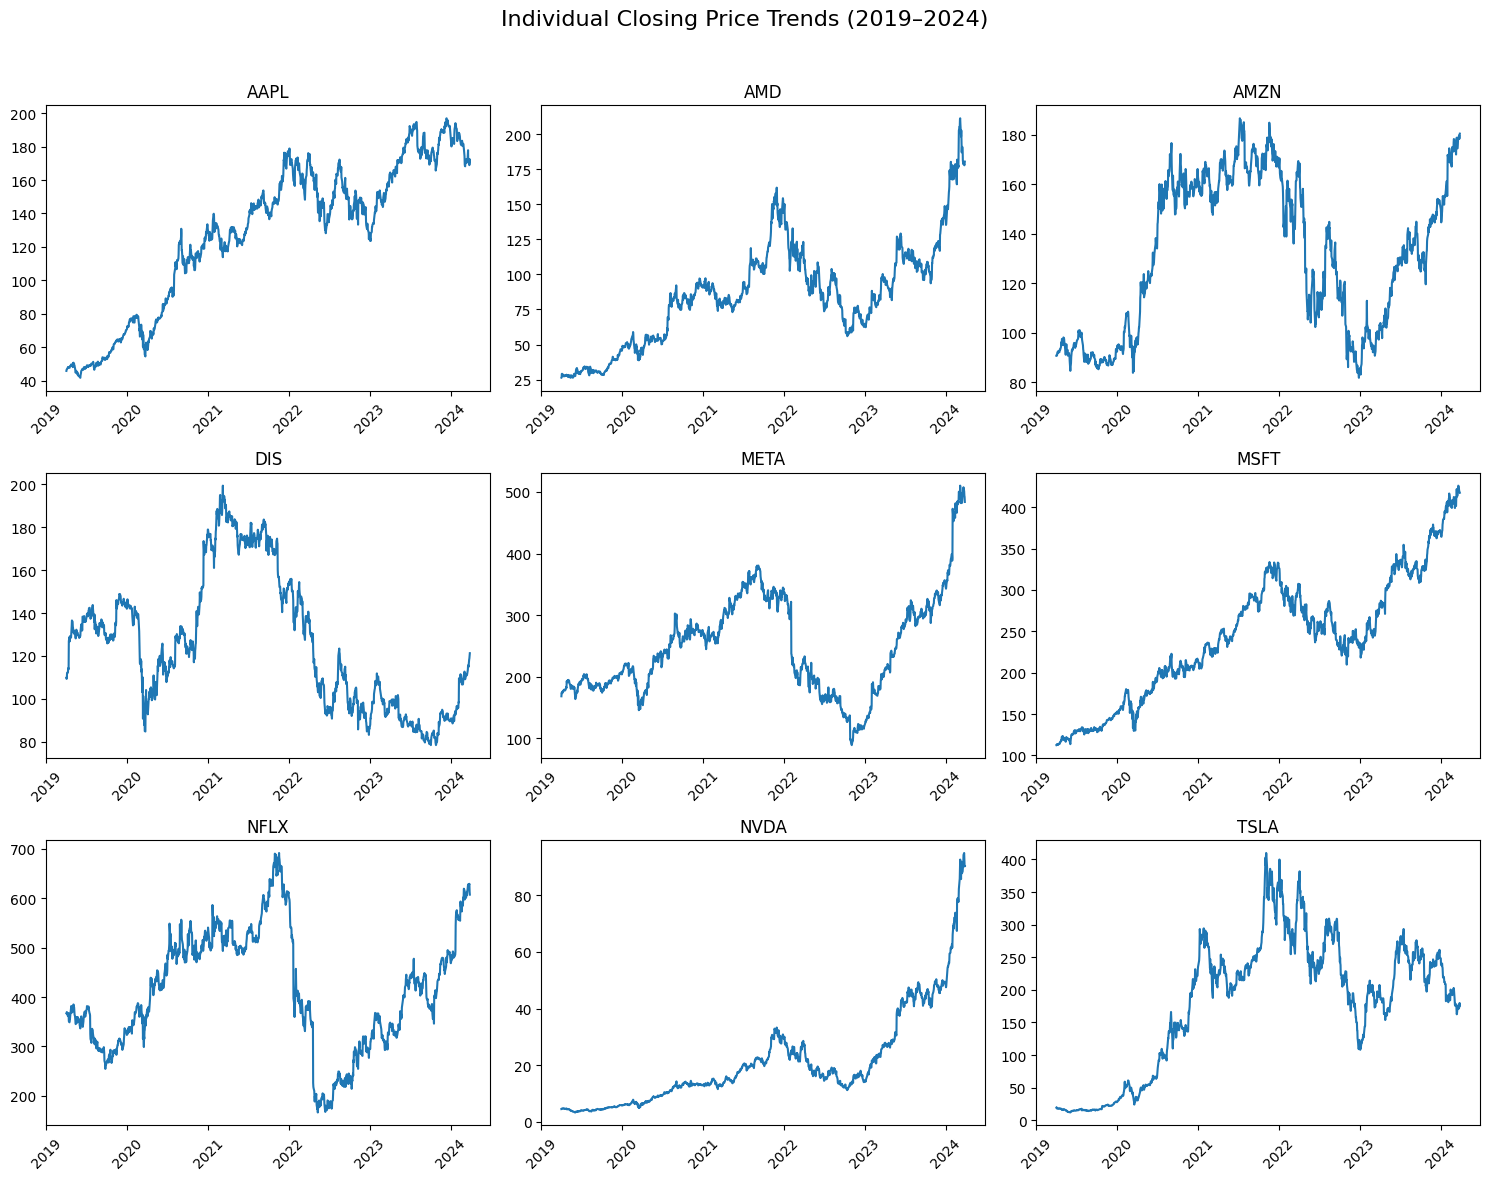

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, ticker in enumerate(stocks_data['Close'].columns):
    axes[i].plot(stocks_data['Close'][ticker], label=ticker)
    axes[i].set_title(ticker)
    axes[i].tick_params(axis='x', rotation=45)

fig.suptitle("Individual Closing Price Trends (2019–2024)", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The subplots provide a clearer view of each stock's unique price behavior over time. We observe that some stocks, like TSLA and NVDA, show sharp volatility and rapid growth phases, while others like DIS exhibit more subdued or declining trends. This breakdown helps highlight the varying risk and return profiles across the portfolio.


# Section 2: Risk & Return Analysis
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

In this section, we shift from visualizing raw stock prices to analyzing the behavior of returns. We calculate daily log returns for each stock, then evaluate variance and volatility to measure risk. Finally, we explore how the assets relate to each other through covariance and correlation heatmaps.


### Calculating percentage change in stock prices

In [4]:
adj_price = stocks_data["Close"]
print(adj_price.head())

log_returns = np.log(adj_price / adj_price.shift(1))
print(log_returns.head())

Ticker           AAPL        AMD       AMZN         DIS        META  \
Date                                                                  
2019-04-01  45.810326  26.360001  90.709503  109.795227  167.908646   
2019-04-02  46.476265  26.750000  90.698997  109.258492  173.382843   
2019-04-03  46.794846  29.020000  91.035004  109.804985  172.725937   
2019-04-04  46.876286  29.090000  90.943001  111.981178  175.194321   
2019-04-05  47.190105  28.980000  91.863998  112.225136  174.895706   

Ticker            MSFT        NFLX      NVDA       TSLA  
Date                                                     
2019-04-01  112.435806  366.959991  4.524565  19.278667  
2019-04-02  112.596413  367.720001  4.542436  19.058666  
2019-04-03  113.333282  369.750000  4.681936  19.454000  
2019-04-04  112.757019  367.880005  4.673000  17.851999  
2019-04-05  113.257675  365.489990  4.739770  18.330667  
Ticker          AAPL       AMD      AMZN       DIS      META      MSFT  \
Date                  

We calculate daily log returns to measure the rate of change in stock prices. Unlike raw percentage change, log returns are symmetric and additive over time, making them better suited for financial analysis and portfolio modeling.

<hr style="border: 1px solid #fdb515;" />

### Variance

Ticker
AAPL    0.000400
AMD     0.001085
AMZN    0.000488
DIS     0.000457
META    0.000798
MSFT    0.000366
NFLX    0.000887
NVDA    0.001047
TSLA    0.001659
dtype: float64


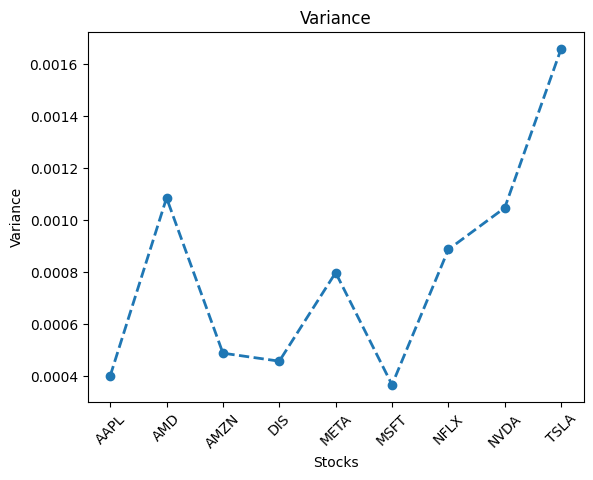

In [ ]:
var = log_returns.var()
print(var)

plt.plot(var, linestyle = "dashed", marker='o', linewidth = 2)
plt.xlabel("Stocks")
plt.ylabel("Variance")
plt.title("Variance")
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation = 45)

plt.show()

This plot shows the variance of daily log returns for each stock, which indicates the degree of fluctuation in price. TSLA and AMD have the highest variance, reflecting their greater day-to-day volatility, while MSFT and AAPL show more stable behavior over the observed period.

<hr style="border: 1px solid #fdb515;" />

### Volatility

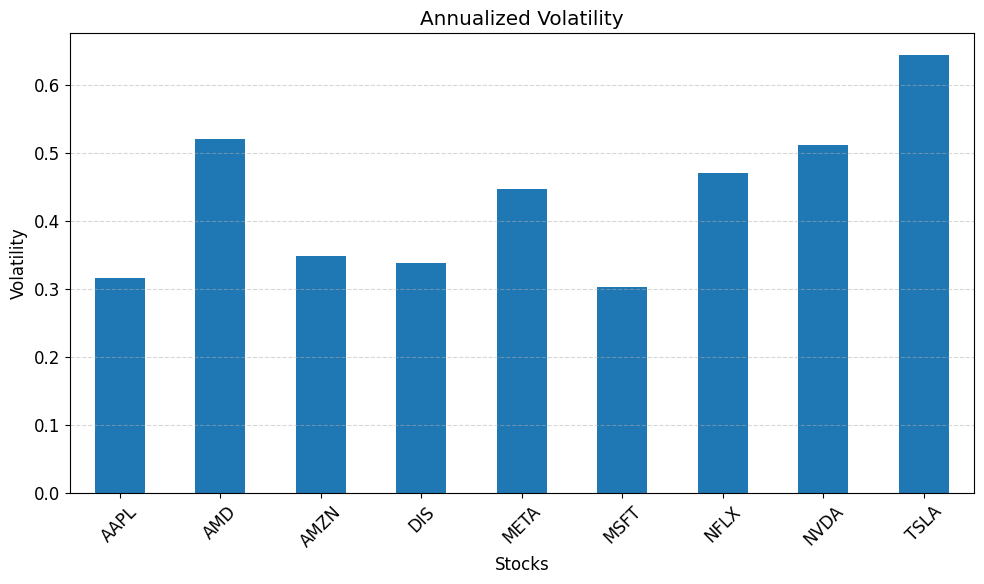

In [ ]:
volatility = log_returns.std() * np.sqrt(250)

volatility.plot(kind='bar', title="Annualized Volatility", figsize=(10, 6))
plt.xlabel("Stocks")
plt.ylabel("Volatility")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This bar chart displays the annualized standard deviation of log returns, representing the risk or uncertainty of each stock’s returns. TSLA has the highest volatility, followed by AMD and NVDA, indicating these stocks experience more dramatic price swings. In contrast, MSFT and AAPL show the lowest volatility, suggesting more consistent performance.

<hr style="border: 1px solid #fdb515;" />

### Covariance

Ticker      AAPL       AMD      AMZN       DIS      META      MSFT      NFLX  \
Ticker                                                                         
AAPL    0.000400  0.000380  0.000271  0.000197  0.000324  0.000289  0.000270   
AMD     0.000380  0.001085  0.000415  0.000260  0.000457  0.000391  0.000427   
AMZN    0.000271  0.000415  0.000488  0.000197  0.000385  0.000290  0.000351   
DIS     0.000197  0.000260  0.000197  0.000457  0.000238  0.000198  0.000225   
META    0.000324  0.000457  0.000385  0.000238  0.000798  0.000335  0.000412   
MSFT    0.000289  0.000391  0.000290  0.000198  0.000335  0.000366  0.000270   
NFLX    0.000270  0.000427  0.000351  0.000225  0.000412  0.000270  0.000887   
NVDA    0.000423  0.000813  0.000435  0.000285  0.000503  0.000441  0.000455   
TSLA    0.000408  0.000609  0.000394  0.000276  0.000400  0.000360  0.000438   

Ticker      NVDA      TSLA  
Ticker                      
AAPL    0.000423  0.000408  
AMD     0.000813  0.000609  
AMZ

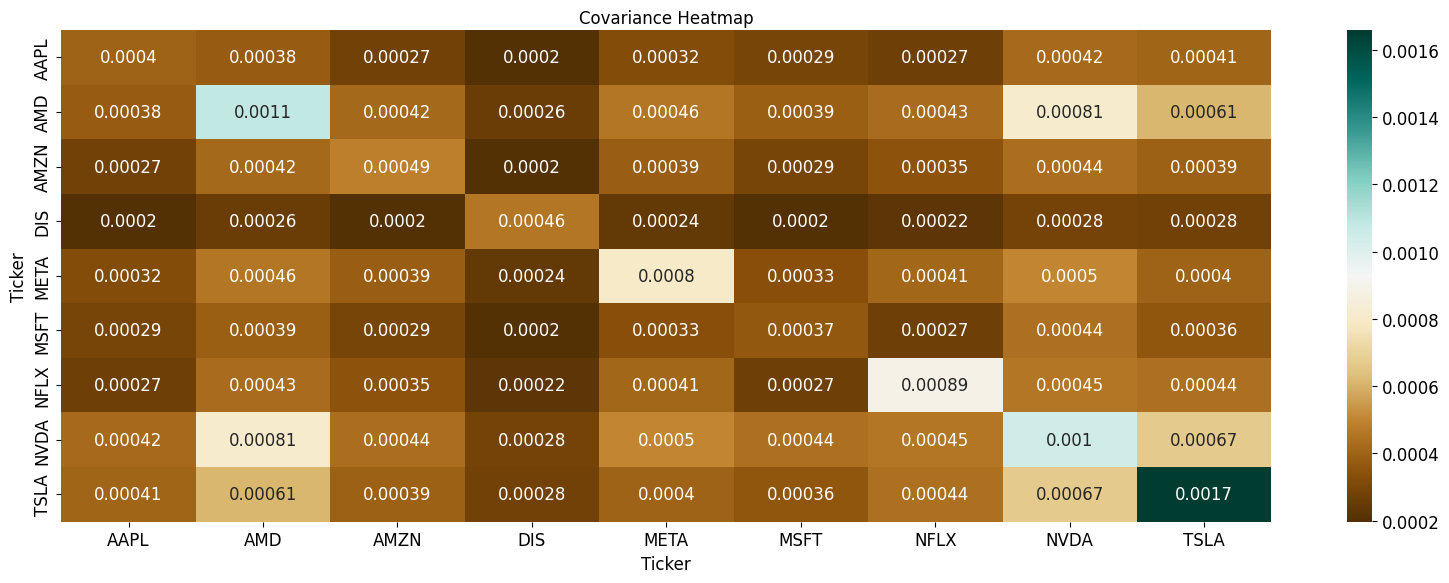

In [ ]:
cov = log_returns.cov()
print(cov)

plt.figure(figsize=(16, 6))
cov_heatmap = sns.heatmap(cov, annot=True, cmap='BrBG', annot_kws={"size": 12})
cov_heatmap.set_title('Covariance Heatmap', fontdict={'fontsize': 12}, pad=5)
plt.tight_layout()
plt.show()

Covariance quantifies how the returns of two assets move together. In this heatmap, all values are positive, suggesting that the selected stocks tend to move in the same direction over time. While TSLA, AMD, and NVDA show relatively strong co-movement with others, assets with lower covariance — like DIS — may offer better diversification potential.

<hr style="border: 1px solid #fdb515;" />

### Correlation

Ticker      AAPL       AMD      AMZN       DIS      META      MSFT      NFLX  \
Ticker                                                                         
AAPL    1.000000  0.575793  0.613884  0.461401  0.573687  0.754887  0.452284   
AMD     0.575793  1.000000  0.570515  0.368578  0.491002  0.620533  0.435595   
AMZN    0.613884  0.570515  1.000000  0.417370  0.617324  0.685428  0.533841   
DIS     0.461401  0.368578  0.417370  1.000000  0.394347  0.484661  0.353321   
META    0.573687  0.491002  0.617324  0.394347  1.000000  0.619354  0.489287   
MSFT    0.754887  0.620533  0.685428  0.484661  0.619354  1.000000  0.473764   
NFLX    0.452284  0.435595  0.533841  0.353321  0.489287  0.473764  1.000000   
NVDA    0.652400  0.762533  0.609054  0.411671  0.550807  0.711735  0.471967   
TSLA    0.500203  0.453825  0.438118  0.317153  0.347995  0.461405  0.361087   

Ticker      NVDA      TSLA  
Ticker                      
AAPL    0.652400  0.500203  
AMD     0.762533  0.453825  
AMZ

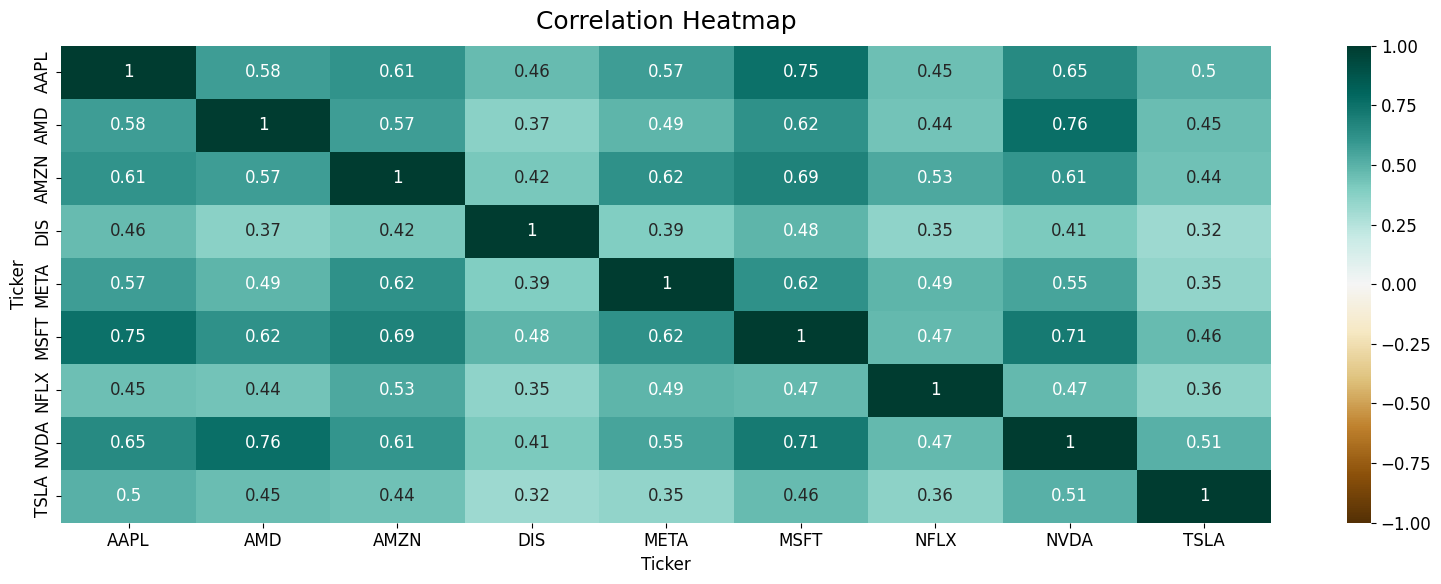

In [ ]:
corr = log_returns.corr()
print(corr)

plt.figure(figsize=(16, 6))
corr_heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.tight_layout()
plt.show()

Correlation measures the strength and direction of the relationship between two asset returns, scaled from -1 to 1. Most stocks in this portfolio are moderately to highly correlated, especially among large tech firms like AAPL, MSFT, and NVDA. While these strong positive relationships indicate shared market exposure, they also highlight the importance of diversification to reduce overlapping risk.

# Section 3: Portfolio Optimization
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

In this section, we simulate thousands of randomly weighted portfolios using the selected assets and evaluate their performance based on expected return, volatility, and Sharpe ratio. We use these simulations to construct the Efficient Frontier, identify the minimum volatility portfolio, and find the optimal risk-adjusted portfolio using the Sharpe ratio. This allows us to visualize the trade-off between risk and return and determine ideal asset allocations.


### Calculating Portfolio Expected Return

In [9]:
weights = np.array([0.1, 0.1, 0.1, 0.05, 0.05, 0.2, 0.25, 0.03, 0.12])

expected_daily_returns = log_returns.mean()
print("Expected Daily Returns:\n")
print(expected_daily_returns)

portfolio_daily_return = np.dot(expected_daily_returns, weights)
print("\nExpected Portfolio Daily Return:")
print(portfolio_daily_return)

Expected Daily Returns:

Ticker
AAPL    0.001046
AMD     0.001530
AMZN    0.000547
DIS     0.000079
META    0.000842
MSFT    0.001044
NFLX    0.000401
NVDA    0.002382
TSLA    0.001758
dtype: float64

Expected Portfolio Daily Return:
0.0009498258591720274


The output above shows the average daily log return for each stock in the portfolio, representing the individual expected performance based on historical trends. By applying predefined weights to each asset, we compute the portfolio’s overall expected daily return as a weighted average of the individual returns. This value (approximately 0.00095) reflects the projected daily growth rate of the portfolio under the current allocation.

<hr style="border: 1px solid #fdb515;" />

### Portfolio Variance

In [10]:
cov_matrix = log_returns.cov()
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_std_dev = np.sqrt(portfolio_variance)

print("Portfolio Variance:", portfolio_variance)
print("Portfolio Volatility (Annualized):", portfolio_std_dev * np.sqrt(250))


Portfolio Variance: 0.0004181097327990075
Portfolio Volatility (Annualized): 0.32330702621463686


We compute the portfolio’s variance using the covariance matrix of log returns and the assigned asset weights. The result reflects the total risk of the portfolio, accounting for how assets interact. We also convert the variance into annualized volatility to align with financial industry standards.

<hr style="border: 1px solid #fdb515;" />

### Returns and Volatility

In [11]:
annual_returns = log_returns.mean() * 250
annual_volatility = log_returns.std() * np.sqrt(250)

assets = pd.concat([annual_returns, annual_volatility], axis=1)
assets.columns = ['Returns', 'Volatility']
print(assets)

         Returns  Volatility
Ticker                      
AAPL    0.261584    0.316418
AMD     0.382623    0.520888
AMZN    0.136715    0.349224
DIS     0.019755    0.338033
META    0.210478    0.446598
MSFT    0.260935    0.302584
NFLX    0.100203    0.470859
NVDA    0.595447    0.511675
TSLA    0.439596    0.644070


This table displays each stock’s expected annual return alongside its annualized volatility, both derived from log returns. It provides a clear comparison of each asset’s risk-return profile, which is essential for evaluating portfolio composition and optimization strategies.

<hr style="border: 1px solid #fdb515;" />

### Efficient Frontier

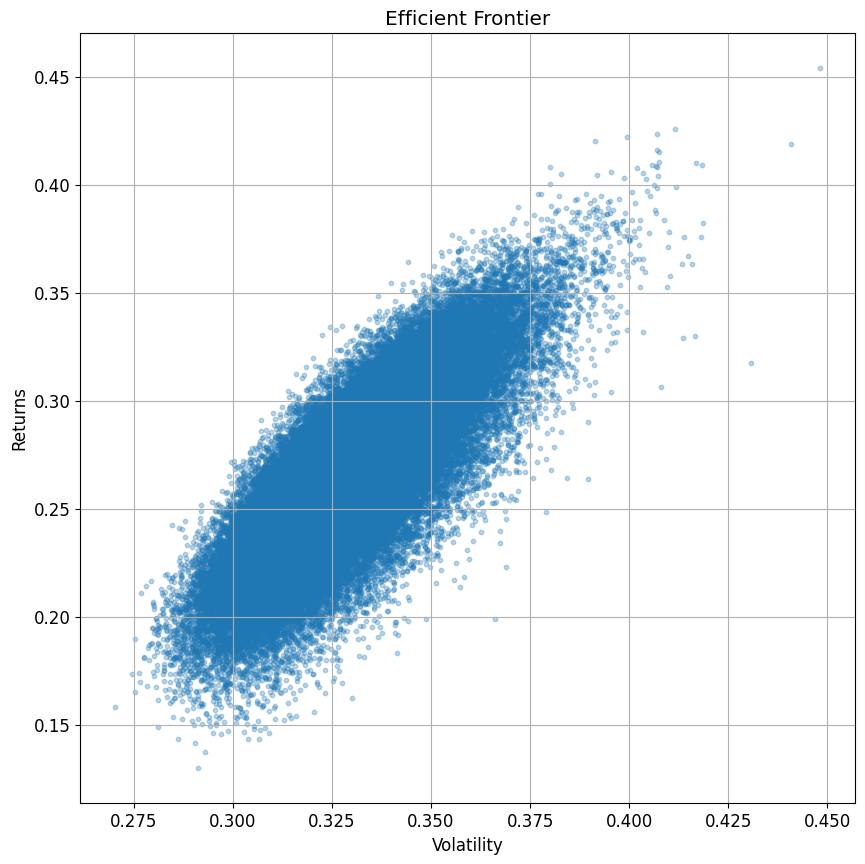

In [ ]:
# Setup
np.random.seed(28)

p_ret = []
p_vol = []
p_weights = []

num_assets = len(log_returns.columns)
num_portfolios = 100000
expected_returns = log_returns.mean() * 250
cov_matrix = log_returns.cov() * 250

for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    p_weights.append(weights)

    ret = np.dot(weights, expected_returns)
    p_ret.append(ret)

    var = np.dot(weights.T, np.dot(cov_matrix, weights))
    p_vol.append(np.sqrt(var))

portfolios = pd.DataFrame({
    'Returns': p_ret,
    'Volatility': p_vol
})

for i, symbol in enumerate(log_returns.columns):
    portfolios[f'{symbol} weight'] = [w[i] for w in p_weights]

portfolios.plot.scatter(
    x='Volatility', y='Returns', alpha=0.3, marker='o', s=10,
    grid=True, figsize=(10, 10), title="Efficient Frontier"
)
plt.show()


The Efficient Frontier visualizes the trade-off between risk and return across 100,000 randomly generated portfolios. Each point represents a different portfolio allocation, with its corresponding annualized return and volatility. The boundary of this cloud (the upper-left edge) shows the optimal portfolios that provide the highest return for a given level of risk.

<hr style="border: 1px solid #fdb515;" />

### Minimum volatility portfolio

Returns        0.158326
Volatility     0.270362
AAPL weight    0.296853
AMD weight     0.014740
AMZN weight    0.162542
DIS weight     0.315640
META weight    0.009948
MSFT weight    0.116489
NFLX weight    0.071945
NVDA weight    0.010727
TSLA weight    0.001118
Name: 40184, dtype: float64


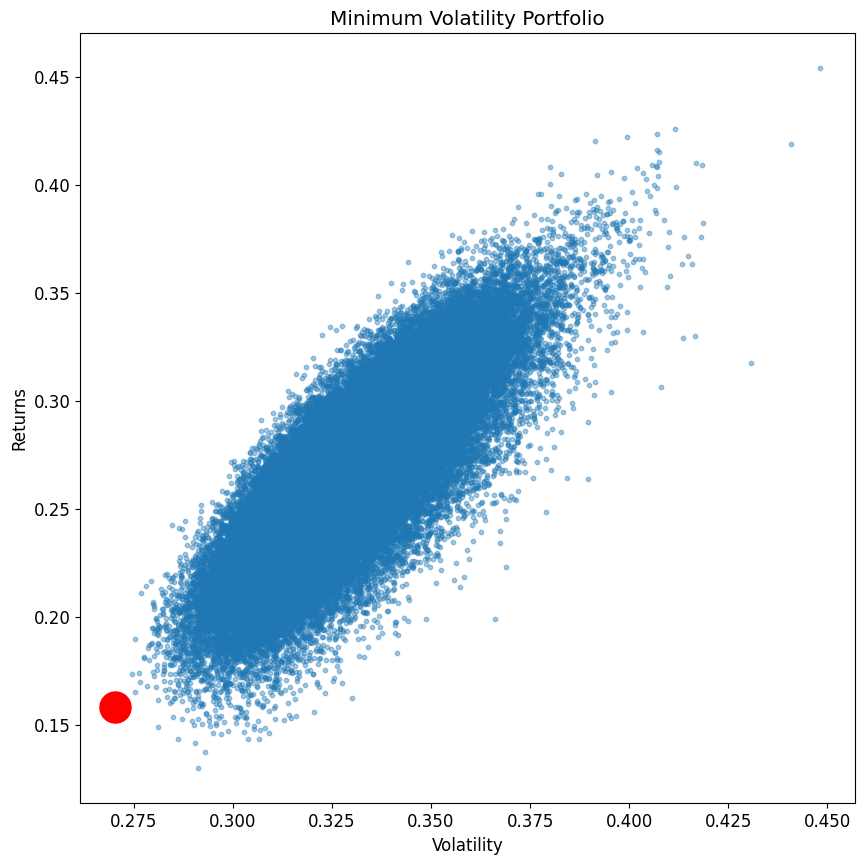

In [ ]:
min_vol_port = portfolios.loc[portfolios['Volatility'].idxmin()]
print(min_vol_port)

plt.figure(figsize=[10, 10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], s=10, alpha=0.4)
plt.scatter(min_vol_port['Volatility'], min_vol_port['Returns'], color='red', marker='o', s=500)
plt.title("Minimum Volatility Portfolio")
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.show()

The red point in the graph above marks the minimum volatility portfolio — the most stable allocation across all simulated portfolios. It offers the least amount of risk, but as seen in the plot, this comes at the cost of a relatively low return. While it appeals to highly risk-averse investors, most are willing to accept some risk in exchange for higher gains.

This brings us to the concept of the **Sharpe Ratio**, which helps us identify the optimal portfolio that achieves the best return for each unit of risk — our next step in portfolio optimization.

<hr style="border: 1px solid #fdb515;" />

### Sharpe Ratio

The Sharpe Ratio measures how much excess return a portfolio generates for each unit of risk taken. It helps investors identify the most efficient portfolio in terms of risk-adjusted performance.

Volatility here refers to the portfolio’s standard deviation, while the risk-free rate represents the return from a theoretically riskless asset, such as short-term government bonds.

The portfolio with the **highest Sharpe Ratio** is considered the optimal risky portfolio.

$$
\text{Sharpe Ratio} = \frac{R_{p}-R_{f}}{\sigma_{p}}
$$

$R_{p}$ = return of portfolio  
$R_{f}$ = risk-free rate  
$\sigma_{p}$ = standard deviation of portfolio


<hr style="border: 1px solid #fdb515;" />

### Optimal Portfolio

To find the portfolio with the best risk-adjusted return, we first retrieve the **3-month U.S. Treasury bill rate** from FRED to use as our risk-free rate. This provides a more realistic benchmark compared to using a fixed placeholder value.

In [14]:
from pandas_datareader import data as pdr

start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2024, 4, 1)

rf_series = pdr.DataReader('DTB3', 'fred', start, end)

risk_free_rate = rf_series.mean().values[0] / 100
print(f"Average Risk-Free Rate (2019–2024): {risk_free_rate:.4f}")


Average Risk-Free Rate (2019–2024): 0.0205


We then compute the Sharpe Ratio for each simulated portfolio and select the one with the **highest Sharpe Ratio**. This optimal portfolio is highlighted in green on the Efficient Frontier chart.

Returns        0.420313
Volatility     0.391254
AAPL weight    0.149165
AMD weight     0.017147
AMZN weight    0.063801
DIS weight     0.017303
META weight    0.022964
MSFT weight    0.053033
NFLX weight    0.064296
NVDA weight    0.458090
TSLA weight    0.154199
Name: 27328, dtype: float64


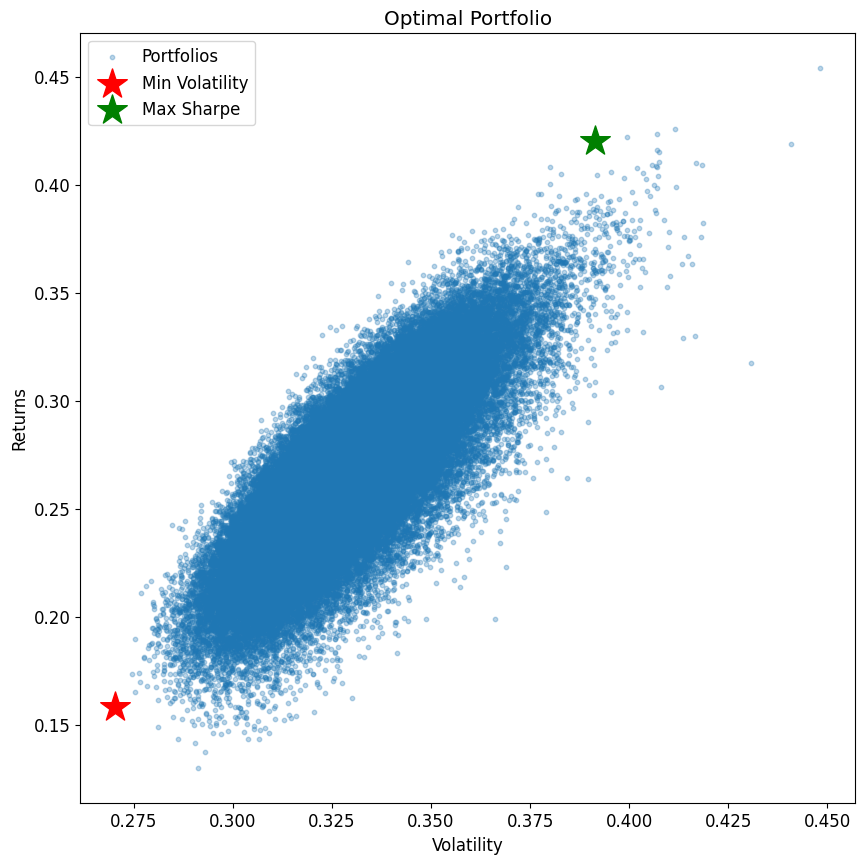

In [ ]:
sharpe_ratios = (portfolios['Returns'] - risk_free_rate) / portfolios['Volatility']
optimal_risky_port = portfolios.loc[sharpe_ratios.idxmax()]
print(optimal_risky_port)

plt.figure(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], s=10, alpha=0.3, label='Portfolios')
plt.scatter(min_vol_port['Volatility'], min_vol_port['Returns'], color='red', marker='*', s=500, label='Min Volatility')
plt.scatter(optimal_risky_port['Volatility'], optimal_risky_port['Returns'], color='green', marker='*', s=500, label='Max Sharpe')
plt.title("Optimal Portfolio")
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.legend()
plt.show()

The chart above visualizes 100,000 randomly generated portfolios with varying risk-return combinations. Each point represents a potential portfolio of our selected stocks.

- 🔴 The **red star** denotes the portfolio with the **lowest volatility**, ideal for risk-averse investors. While it carries the least risk, it also offers lower expected returns.

- 🟢 The **green star** marks the portfolio with the **highest Sharpe Ratio**, meaning it offers the best risk-adjusted return. This is considered the **optimal risky portfolio**.

Our optimal portfolio achieves an expected annual return of **42.0%** with an annualized volatility of **39.1%**. It places the largest weights on:
- **NVIDIA (45.8%)**
- **Tesla (15.4%)**
- **Apple (14.9%)**

Minimal weights are allocated to **DIS**, **AMD**, and **META**, indicating they have less influence on maximizing return per unit of risk.

This portfolio demonstrates a strong preference for high-growth, high-volatility tech stocks, offering aggressive returns with a measured level of risk.

<hr style="border: 1px solid #fdb515;" />

### Portfolio Comparison

To better understand the tradeoff between risk and reward, we compare the two key portfolios identified in this analysis:

- **Minimum Volatility Portfolio**: Focuses on minimizing risk. It’s suitable for conservative investors willing to sacrifice some return for greater stability.
- **Maximum Sharpe Portfolio**: Optimizes for the highest return per unit of risk. This is the most efficient use of capital under modern portfolio theory.

Below is a table summarizing each portfolio's expected annual return, volatility, and Sharpe ratio:


In [16]:
comparison_data = {
    'Portfolio': ['Minimum Volatility', 'Maximum Sharpe'],
    'Expected Return': [min_vol_port['Returns'], optimal_risky_port['Returns']],
    'Volatility': [min_vol_port['Volatility'], optimal_risky_port['Volatility']],
    'Sharpe Ratio': [
        (min_vol_port['Returns'] - risk_free_rate) / min_vol_port['Volatility'],
        (optimal_risky_port['Returns'] - risk_free_rate) / optimal_risky_port['Volatility']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

            Portfolio  Expected Return  Volatility  Sharpe Ratio
0  Minimum Volatility         0.158326    0.270362      0.509783
1      Maximum Sharpe         0.420313    0.391254      1.021873


<hr style="border: 1px solid #fdb515;" />

### Top Asset Contributors to Return and Risk

To better understand what drives the optimal portfolio’s performance, we break down how much each asset contributes to both **expected return** and **overall portfolio risk**.

- **Return contribution** is calculated by multiplying each asset’s portfolio weight by its expected return.
- **Risk contribution** reflects each asset’s weighted impact on total portfolio volatility using the covariance matrix.

The bar chart that follows visualizes the top five contributors to each, helping identify which assets have the most influence on performance and risk exposure.

Top Contributors to Expected Return:

Ticker
NVDA    0.272769
TSLA    0.067785
AAPL    0.039019
MSFT    0.013838
AMZN    0.008723
dtype: float64

Top Contributors to Portfolio Risk:

Ticker
NVDA    0.086631
TSLA    0.027721
AAPL    0.014301
NFLX    0.006920
AMZN    0.006206
dtype: float64


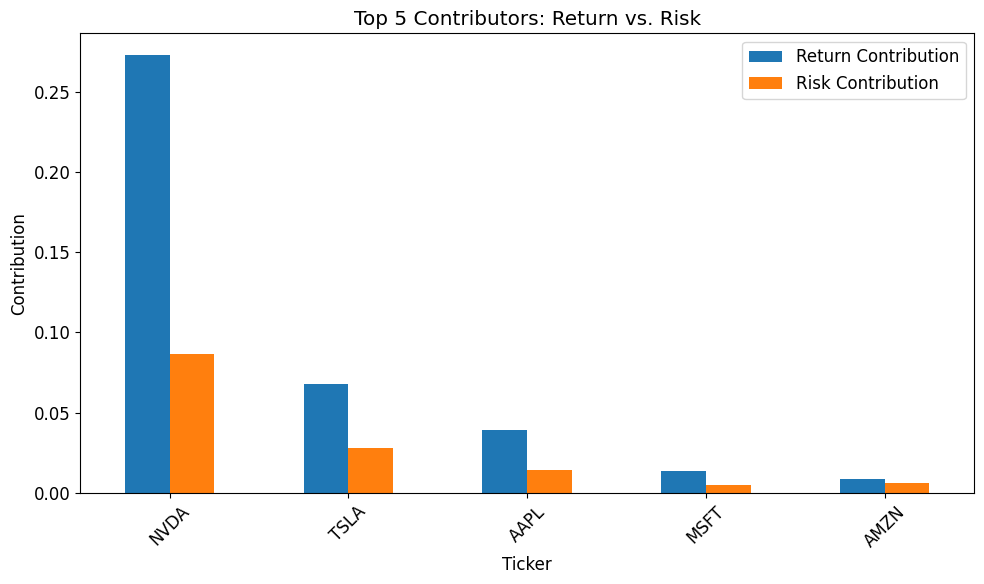

In [ ]:
weights = np.array([optimal_risky_port[f"{ticker} weight"] for ticker in adj_price.columns])

expected_contributions = expected_returns * weights
return_contrib = pd.Series(expected_contributions, index=adj_price.columns).sort_values(ascending=False)

weighted_cov_matrix = cov_matrix.mul(weights, axis=0).mul(weights, axis=1)
risk_contrib = weighted_cov_matrix.sum().sort_values(ascending=False)

print("Top Contributors to Expected Return:\n")
print(return_contrib.head())

print("\nTop Contributors to Portfolio Risk:\n")
print(risk_contrib.head())

combined = pd.DataFrame({
    'Return Contribution': return_contrib.head(5),
    'Risk Contribution': risk_contrib[return_contrib.head(5).index]
})

combined.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Contributors: Return vs. Risk')
plt.ylabel('Contribution')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The bar chart above illustrates the top five assets contributing to both **expected return** and **portfolio risk** in the optimal Sharpe portfolio.

- **NVIDIA** stands out as the dominant driver of both return and risk, contributing over 27% to expected returns and more than 8% to overall volatility.
- **Tesla** and **Apple** follow as significant contributors to both performance and portfolio risk.
- **Microsoft** and **Amazon** contribute modestly to return, while **Netflix** appears as a top risk driver despite not ranking highly on return contribution.

This visualization confirms the portfolio’s concentration in high-growth, high-volatility tech stocks, highlighting how a few assets disproportionately influence its overall behavior and risk-adjusted performance.

<hr style="border: 1px solid #fdb515;" />

# Final Insights

This project explored how portfolio optimization techniques can be used to balance risk and return across a selection of major publicly traded companies. By leveraging historical stock data from Yahoo Finance and applying modern portfolio theory, we visualized market behavior, evaluated portfolio risk metrics, and constructed optimal investment strategies through large-scale simulation.

### Key takeaways:

- **Tech-heavy portfolios** continue to offer exceptional return potential, but with substantial volatility. **NVIDIA** emerged as the most dominant driver of both expected return and portfolio risk, followed by **Tesla**, **Apple**, and **Amazon**.
- The **Minimum Volatility Portfolio** provided the greatest stability, with an expected return of **15.8%** and volatility of **27.0%**, making it ideal for risk-averse investors.
- The **Maximum Sharpe Portfolio** achieved the most efficient risk-adjusted return, with an expected return of **42.0%**, volatility of **39.1%**, and a Sharpe Ratio of **1.02**.
- Incorporating the **3-month Treasury bill rate from FRED** added realism to Sharpe Ratio calculations and improved alignment with market-based benchmarks.
- The **asset contribution analysis** revealed that just a few high-growth stocks—particularly NVIDIA and Tesla—were responsible for a disproportionate share of both return and volatility, underscoring the importance of strategic weight allocation.

This analysis provides a practical framework for applying financial theory in a data-driven environment. Future directions could include adding investment constraints, rebalancing strategies, or macroeconomic factors to further refine portfolio construction and risk management.